In [1]:
import pandas as pd
import numpy as np
#read file:
train = pd.read_csv(r"C:\Users\ASUS\Downloads\train_02.csv")
test = pd.read_csv(r"C:\Users\ASUS\Downloads\test_02.csv")

In [2]:
#将训练数据与测试数据合并到一起，做特征工程
train["source"]="train"
test["source"]="test"

data = pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,data.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
#检验那些列存在缺失值
data.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [4]:
#查看基本的统计变量
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [5]:
"""
问题1：Item_Visibility,可见度最小值不可能为0
问题2：对Outlet_Establishment_Year该列最好的表示方法是建立几年而非几几年建立
问题3：Item_Outlet_Sales与Item_Weight由于缺失值而少
"""
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [6]:
#查看分类变量
data.apply(lambda x:len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [7]:
#过滤分类变量,过滤掉'Item_Identifier','Outlet_Identifier','source'
#分类别打印频率
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=="object"]
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())



Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

In [8]:
#尝试使用describe()直接对离散变量进行数据描述
#describe(),参数include默认描述数值型统计量
data.describe(include="all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4,2
top,Low Fat,NCJ06,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294,8523
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
"""针对分类数据结论如下：
问题4：在Item_Fat_Content列，LF、reg、low fat，需要进行合并
问题5：对于Item_Type，分类条目过多，需要进行分类缩减
问题6：对于Outlet_Type，Supermarket Type2 、Supermarket Type3 需要考虑是否相近来判断是否合并
"""

'针对分类数据结论如下：\n问题4：在Item_Fat_Content列，LF、reg、low fat，需要进行合并\n问题5：对于Item_Type，分类条目过多，需要进行分类缩减\n问题6：对于Outlet_Type，Supermarket Type2 、Supermarket Type3 需要考虑是否相近来判断是否合并\n'

In [10]:
"""数据清洗"""
"""通常来讲，包括缺失值处理、异常值处理、离群值处理"""
#解决问题3
#第一步，输入缺失值Item_Weight and Outlet_Size
item_avg_weight = data.pivot_table(values="Item_Weight",index="Item_Identifier")
#第二步，获取在Item_Weight中缺失值的位置
miss_bool = data["Item_Weight"].isnull()
#第三步，根据Item_Identifier对缺失值进行填充
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))
#-------------------------------------------------------------------------------------
#scipy.stats.mode寻找出现次数最多的成员，返回传入数组/矩阵中最常出现的成员以及出现的次数
from scipy.stats import mode
#第一步，预先处理数据
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print(outlet_size_mode)

#第二步，创建缺失值布尔值
miss_bool = data['Outlet_Size'].isnull() 

#第三步，进行替换
data.loc[miss_bool,"Outlet_Size"] = data.loc[miss_bool,"Outlet_Type"].apply(lambda x: outlet_size_mode[x])
print(sum(data["Outlet_Size"].isnull()))

Final #missing: 0


C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0


In [11]:
"""特征工程"""
#解决问题6
"""使用两样本的独立T检验，检验Supermarket Type2 and Type3销售额是否有显著差异
假设1.两超市销售额服从正态分布2.进行方差齐次检验
H0:Supermarket Type2 and Type3均值之差为0
H1:Supermarket Type2 and Type3均值之差不为0
"""
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')
#改进  进行Supermarket Type1、Supermarket Type2、Supermarket Type3的销售额方差分析

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [12]:
#解决问题1
"""Item_Visibility将0改为产品的平均可见度"""
#确定产品的平均可见性
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
#获取可见度为0的索引
miss_bool = (data['Item_Visibility'] == 0)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))



Number of 0 values after modification: 0


In [13]:
# data["Item_Visibility"].replace(0,numpy.NaN,inplace=True)
# #利用groupby().transform()
# data.groupby("Item_Identifier").transform(lambda x: x.fillna(x.mean()))

In [14]:
"""创建在不同商店商品的重要性，根据visibility_avg来创建"""
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())
#改进  可以尝试更多有用特征的创建

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [15]:
#解决问题5
"""根据FD、DR或NC开头进行创建新类别"""
#提取
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#增加
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()
#后期改进， 可以根据销售额组合来分类为不同的类别

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [16]:
#解决问题2
"""数据集为2013年收集的"""
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [17]:
#解决问题4
"""使用replace对重义词进行合并"""
print("Original Categories:")
print(data['Item_Fat_Content'].value_counts())

print("\nModified Categories:")
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({"LF":"Low Fat",
                                                             "reg":"Regular",
                                                             "low fat":"Low Fat"})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [18]:
#完善问题4
"""根据问题五的处理，我们应该将NC修改为'Non-Edible'"""
data.loc[data['Item_Type_Combined']=="Non-Consumable","Item_Fat_Content"] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [19]:
"""将所有的类别的名义变量转换为数值型变量"""
#进行One-Hot-Coding，首先从sklearn预处理模块将所有分类变编码为数字
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
data['Outlet']
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
#进行One-Hot-Coding，

In [20]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])
data.dtypes
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [21]:
"""导出数据"""
#删除已转换的列
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
#分割为测试集与训练集
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#删除多余的列
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#储存
train.to_csv(r"C:\Users\ASUS\Downloads\train_modified.csv",index=False)
test.to_csv(r"C:\Users\ASUS\Downloads\test_modified.csv",index=False)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
"""建立模型"""

#选用Item_Outlet_Sales总体平均值作为基准线
mean_sales = train['Item_Outlet_Sales'].mean()

#创建一个提交ID与预测结果的dataframe
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#
base1.to_csv(r"C:\Users\ASUS\Downloads\alg0.csv",index=False)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
#导入交叉验证
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    #根据train数据调整算法结构
    alg.fit(dtrain[predictors], dtrain[target])
    
    
    #对训练集进行预测:
    #得到当前超参模型对应的的预测结果
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #建立交叉验证集，模型评估准则使用MSE，评估模型超参数（也就是该模型）在交叉验证集上的得分:
    #作用：得分与接下来几个模型进行对比，作为模型好坏比较的一种测量，根据得分高低帮助我们选择合适的模型
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring="neg_mean_squared_error")
    cv_score = np.sqrt(np.abs(cv_score))
    
    #打印模型报告结果:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #最后在test上最终预测：（不参与任何训练过程）
    dtest[target] = alg.predict(dtest[predictors])
    
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


In [39]:
#建立线性回归模型
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
#提取出线性模型的各系数
coef1 = pd.Series(alg1.coef_, predictors).sort_values()


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.61 | Min - 1075 | Max - 1213


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


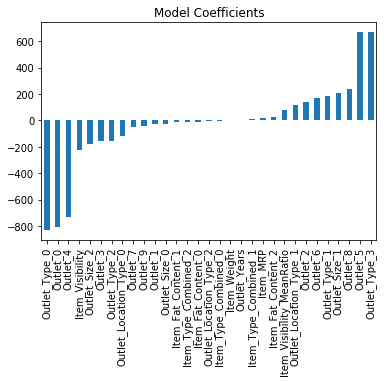

In [40]:
coef1.plot(kind='bar', title='Model Coefficients')

In [47]:
#对于系数结果，可以发现大小差异非常大，容易使模型偏向过高的一些特征，使得模型存在过拟合
#系数量级差异非常之大，就可以怀疑OLS回归过度拟合一些噪音点
#使用带正则化的最小二乘法-岭回归，L2正则

Outlet_Type_0               -829.121060
Outlet_0                    -810.608315
Outlet_4                    -733.402270
Item_Visibility             -226.258100
Outlet_Size_2               -176.102695
Outlet_3                    -153.903731
Outlet_Type_2               -153.903731
Outlet_Location_Type_0      -118.067011
Outlet_7                     -48.220422
Outlet_9                     -43.238128
Outlet_1                     -27.457222
Outlet_Size_0                -27.457222
Item_Fat_Content_1           -15.157906
Item_Type_Combined_2         -15.157906
Item_Fat_Content_0           -14.935316
Outlet_Location_Type_2        -7.615587
Item_Type_Combined_0          -3.846386
Item_Weight                    0.068303
Outlet_Years                   3.578396
Item_Type_Combined_1          13.042043
Item_MRP                      15.558178
Item_Fat_Content_2            26.367974
Item_Visibility_MeanRatio     76.498172
Outlet_Location_Type_1       116.499551
Outlet_2                     140.750711



Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


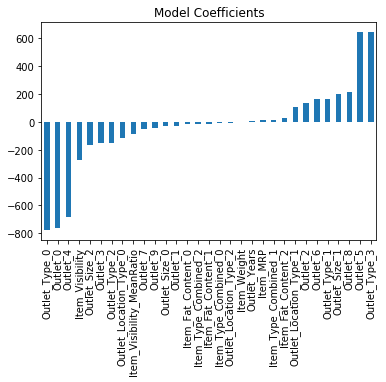

In [48]:
#岭回归模型
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')